# 05 - LightGBM

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Load your dataset
df = pd.read_csv("Numeric data (last year work).csv")

In [3]:
# Define features (X) and target (y)
target_column = "Rating"  # Replace with your actual target column name if different
X = df.drop(columns=[target_column])
y = df[target_column]

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# Initialize LightGBM Regressor
lgbm_model = LGBMRegressor(
    n_estimators=1000,  # Number of boosting rounds
    learning_rate=0.05,  # Learning rate
    max_depth=6,  # Maximum depth of trees
    subsample=0.8,  # Subsample ratio for training
    colsample_bytree=0.8,  # Subsample ratio for each tree
    random_state=42
)

In [6]:
# Train the model
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    early_stopping_rounds=50,
    verbose=100
)

TypeError: fit() got an unexpected keyword argument 'early_stopping_rounds'

In [ ]:
# Make predictions
y_pred = lgbm_model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Lower MSE = better model
# Lower RMSE = better model
# Lower MAE = better model
# R² Score
# 1.0: Perfect model (explains all the variance).
# 0.0: Model performs no better than a horizontal line (mean prediction).

# Linear Regression - 01
# Mean Squared Error (MSE): 0.1328
# Root Mean Squared Error (RMSE): 0.3645
# Mean Absolute Error (MAE): 0.2915
# R² Score: 0.5034

# XGBoost - 02
# Mean Squared Error (MSE): 0.1269
# Root Mean Squared Error (RMSE): 0.3563
# Mean Absolute Error (MAE): 0.2802
# R² Score: 0.5255

# CatBoost - 03
# Mean Squared Error (MSE): 0.1228
# Root Mean Squared Error (RMSE): 0.3504
# Mean Absolute Error (MAE): 0.2792
# R² Score: 0.5411

# AdaBoost - 04
# Mean Squared Error (MSE): 0.1453
# Root Mean Squared Error (RMSE): 0.3811
# Mean Absolute Error (MAE): 0.3070
# R² Score: 0.4570

# my opinion:
# results are quite good except R² Score
# and also this model does not show 
# any significant improvement in metrics

Mean Squared Error (MSE): 0.1328
Root Mean Squared Error (RMSE): 0.3645
Mean Absolute Error (MAE): 0.2915
R² Score: 0.5034


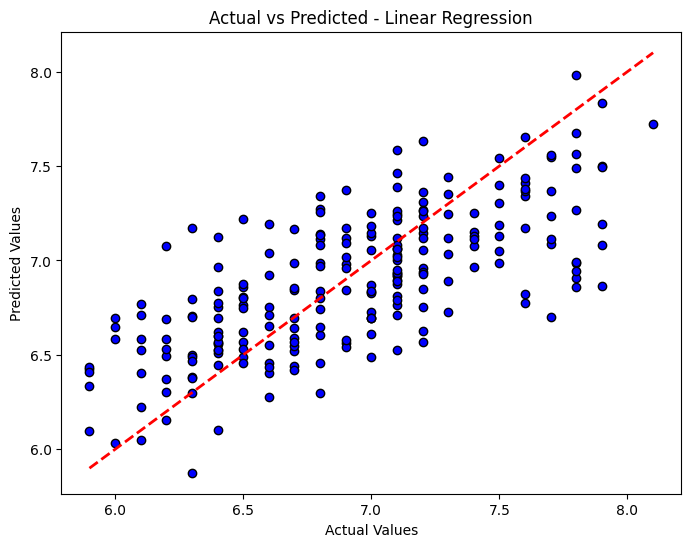

In [ ]:
# Plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# we can see a clear linear graph

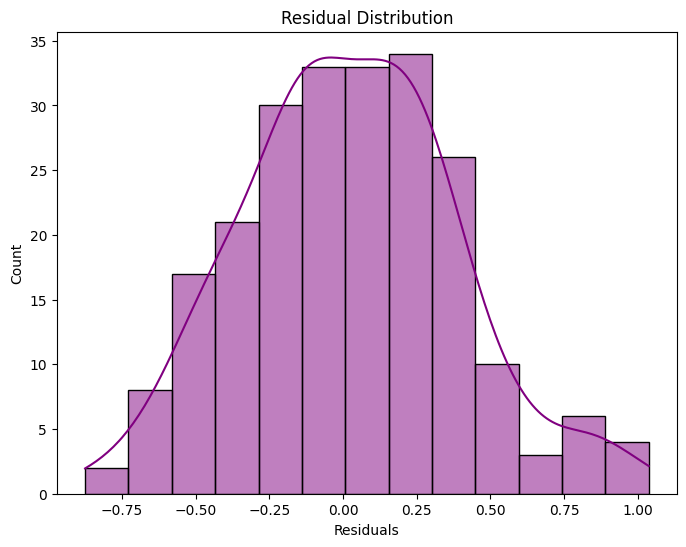

In [ ]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

# distribution looks good